Importing Libraries

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from Adaboost import AdaBoost
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['figure.subplot.hspace'] = 0.4
plt.rcParams['figure.subplot.wspace'] = 0.4

Loading and preparing data

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target
y = y - 1 + (y == 1) # This will make y in {-1,1}

# sanity check
print(X.shape)
print(y.shape)

(569, 30)
(569,)


Spliting data into test, train and validation set

In [3]:
num_train = 455
num_validation = 57
num_test = 57

X_train = X[:num_train]
X_val = X[num_train:num_train+num_validation]
X_test = X[num_train+num_validation:]

y_train = y[:num_train]
y_val = y[num_train:num_train+num_validation]
y_test = y[num_train+num_validation:]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(455, 30)
(57, 30)
(57, 30)
(455,)
(57,)
(57,)


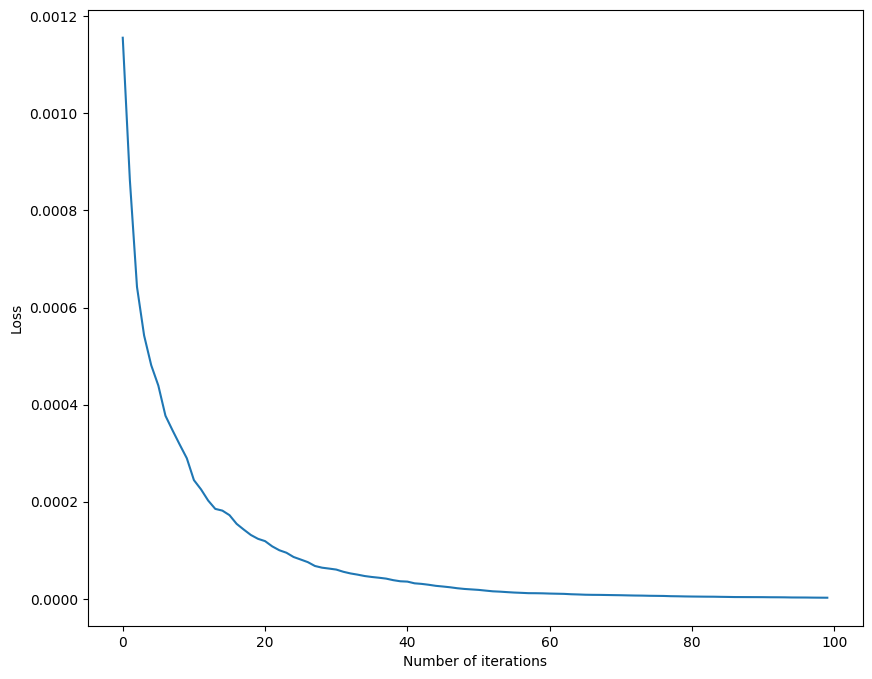

In [26]:
classifier = AdaBoost()
num_iter = 100
hist = classifier.train(X_train,y_train,num_iter)
plt.plot(hist)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

Hyper parameter tuning

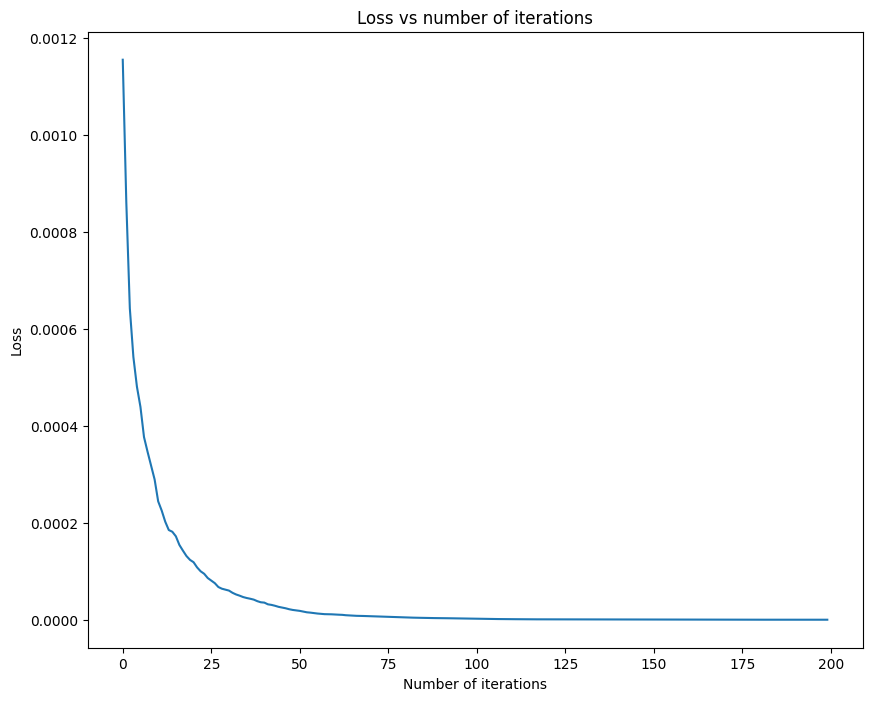

best accuracy of 96.49122807017544 obtained at num of iterations = 50


In [37]:
# y_train_pred = classifier.predict(X_train)
# y_val_pred = classifier.predict(X_val)

# print(f"Train accuracy is {np.mean((y_train_pred == y_train))*100}")
# print(f"Validation accuracy is {np.mean((y_val_pred == y_val))*100}")
nums = [10,30,40,50,70,100,200] 
best_acc = -1
best_num_iter = None
best_model = None
train_accs = []
val_accs = []
hist = None
for n in nums:
    classifier = AdaBoost()
    hist = classifier.train(X_train, y_train, n)
    y_train_pred = classifier.predict(X_train)
    y_val_pred = classifier.predict(X_val)
    train_acc = np.mean((y_train_pred == y_train))*100
    val_acc = np.mean((y_val_pred == y_val))*100
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    if (val_acc > best_acc):
        best_acc = val_acc
        best_num_iter = n
        best_model = classifier

plt.plot(hist)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.title("Loss vs number of iterations")
plt.show()
print(f"best accuracy of {best_acc} obtained at num of iterations = {best_num_iter}")


Test accuracy

In [38]:
y_test_pred = best_model.predict(X_test)
test_acc = np.mean((y_test_pred == y_test))*100
print(f"Test accuracy is {test_acc}")

Test accuracy is 96.49122807017544


In [22]:
from sklearn.tree import DecisionTreeRegressor

stump = DecisionTreeRegressor(max_depth=1)
stump.fit(X,np.hstack((y.reshape(-1,1),~y.reshape(-1,1))))
stump.predict(X)

array([[-0.88421053, -0.11578947],
       [-0.88421053, -0.11578947],
       [-0.88421053, -0.11578947],
       ...,
       [-0.88421053, -0.11578947],
       [-0.88421053, -0.11578947],
       [ 0.82585752, -1.82585752]])